

### Лабораторная работа №5 **Проведение A/B тестирования**

### Индивидуальный вариант №16

Задание по варианту:
* Для первой части:
> 4 вариант (из 6 возможных 16 варианту соотвнетствует имменно этот)
> 
> Изобразить точечный график числа заказов по пользователям.

In [1]:
# Подключаем библиотеку для обработки и анализа данных
import pandas as pd

In [2]:
# Загружаем датасет
df_orders   = pd.read_csv('orders.csv', delimiter=',')
df_visitors = pd.read_csv('visitors.csv', delimiter=',')
df_logs_exp = pd.read_csv('logs_exp.csv', delimiter='\t')

In [3]:
# Выводим информацию о данных датасета
print(df_orders.info(),   end='\n\n')
print(df_visitors.info(), end='\n\n')
print(df_logs_exp.info(), end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          ------------

In [4]:
# Выводим первые 5 строк датасета orders
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
# Выводим первые 5 строк датасета visitors
df_visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [6]:
# Выводим первые 5 строк датасета logs_exp
df_logs_exp.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


### Вывод

Ознакомившись с данные на первый взгляд с ними все хорошо только названия столбцов нужно привести к единому змеиному регистру, переименовывать не нужно так как названия столбцов соответствуют содержимому.

# Предварительная подготовка данных

## Устранение проблем названий столбцов

In [7]:
# Вывели названия столбцов таблицы
print('Столбцы logs_exp.csv:', *df_logs_exp.columns.tolist(), sep='\n', end='\n\n')
print('Столбцы orders.csv:',   *df_orders.columns.tolist(),   sep='\n', end='\n\n')
print('Столбцы visitors.csv:', *df_visitors.columns.tolist(), sep='\n', end='\n\n')

Столбцы logs_exp.csv:
EventName
DeviceIDHash
EventTimestamp
ExpId

Столбцы orders.csv:
transactionId
visitorId
date
revenue
group

Столбцы visitors.csv:
date
group
visitors



In [8]:
# Исправляем названия столбцов
df_logs_exp.columns = ['event_name', 'device_id_hash', 'event_timestamp', 'exp_id']
df_orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

### Вывод

Привели названия столбцов к змеиному регистру.

## Обработка пропусков

In [9]:
# Поиск пустых значений
print('Пропуски в столбцах logs_exp.csv:', df_logs_exp.isnull().sum(), sep='\n', end='\n\n')
print('Пропуски в столбцах orders.csv:',   df_orders.isnull().sum(),   sep='\n', end='\n\n')
print('Пропуски в столбцах visitors.csv:', df_visitors.isnull().sum(), sep='\n', end='\n\n')

Пропуски в столбцах logs_exp.csv:
event_name         0
device_id_hash     0
event_timestamp    0
exp_id             0
dtype: int64

Пропуски в столбцах orders.csv:
transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

Пропуски в столбцах visitors.csv:
date        0
group       0
visitors    0
dtype: int64



### Вывод

Пропусков в дата сете не оказалось, исправлять ничего не нужно – это упрощает нам работу.

## Устранение дубликатов 

### Явные дубликаты

In [10]:
# проверим, есть ли дубликаты в таблице
print('Кол-во явных дубликатов в logs_exp.csv:', df_logs_exp.duplicated().sum())
print('Кол-во явных дубликатов в orders.csv:',   df_orders.duplicated().sum())
print('Кол-во явных дубликатов в visitors.csv:', df_visitors.duplicated().sum())

Кол-во явных дубликатов в logs_exp.csv: 413
Кол-во явных дубликатов в orders.csv: 0
Кол-во явных дубликатов в visitors.csv: 0


In [11]:
# Удаляем дубликаты
df_logs_exp.drop_duplicates(inplace=True)
print('Кол-во явных дубликатов в logs_exp.csv:', df_logs_exp.duplicated().sum())

Кол-во явных дубликатов в logs_exp.csv: 0


### Вывод

Удалили явные дубликаты из датафрейма logs_exp.csv

### Удаление неявных дубликатов

In [12]:
# Поиск неявных дубликатов
print(*df_logs_exp['event_name'].unique(), sep='\n')

MainScreenAppear
PaymentScreenSuccessful
CartScreenAppear
OffersScreenAppear
Tutorial


In [13]:
# Поиск неявных дубликатов
print(*df_logs_exp['exp_id'].unique(), sep='\n')

246
248
247


In [14]:
# Поиск неявных дубликатов
print(*df_orders['group'].unique(), sep='\n')

B
A


In [15]:
# Поиск неявных дубликатов
print(*df_visitors['group'].unique(), sep='\n')

A
B


Неявных дубликатов не обнаруженно

## Исправляем типы данных

In [16]:
# Проверка типов данных
df_logs_exp.dtypes

event_name         object
device_id_hash      int64
event_timestamp     int64
exp_id              int64
dtype: object

In [17]:
# Установка необходимых типов данных
df_logs_exp['event_name'] = df_logs_exp['event_name'].astype('string')
df_logs_exp['event_timestamp'] = pd.to_datetime(df_logs_exp['event_timestamp'], unit='s')

In [18]:
# Проверка типов данных
df_orders.dtypes

transaction_id     int64
visitor_id         int64
date              object
revenue            int64
group             object
dtype: object

In [19]:
# Установка необходимых типов данных
df_orders['date'] = df_orders['date'].astype('datetime64[ns]')
df_orders['group'] = df_orders['group'].astype('string')

In [20]:
# Проверка типов данных
df_visitors.dtypes

date        object
group       object
visitors     int64
dtype: object

In [21]:
# Установка необходимых типов данных
df_visitors['date'] = df_visitors['date'].astype('datetime64[ns]')
df_visitors['group'] = df_visitors['group'].astype('string')

# Первая часть

## Поиск и удаление пересекающихся пользователей

In [22]:
# Выделяем группы А и В теста
df_orders_A = df_orders.loc[df_orders['group'] == 'A']
df_orders_B = df_orders.loc[df_orders['group'] == 'B']

# Находим пересечения пользователей
df_orders_intr = pd.merge(df_orders_A, df_orders_B, how ='inner', on =['visitor_id'])
df_orders_intr

,transaction_id_x,visitor_id,date_x,revenue_x,group_x,transaction_id_y,date_y,revenue_y,group_y
0,2961555356,4069496402,2019-08-15,400,A,1473132782,2019-08-12,640,B
1,2223239646,199603092,2019-08-15,3488,A,437656952,2019-08-02,3488,B
2,62794304,199603092,2019-08-22,6976,A,437656952,2019-08-02,3488,B
3,2971973105,199603092,2019-08-27,2790,A,437656952,2019-08-02,3488,B
4,1941707234,199603092,2019-08-12,6438,A,437656952,2019-08-02,3488,B
...,...,...,...,...,...,...,...,...,...
178,3757656646,4186807279,2019-08-14,4990,A,1759418862,2019-08-21,18560,B
179,3757656646,4186807279,2019-08-14,4990,A,380064637,2019-08-27,13740,B
180,3612788481,2712142231,2019-08-14,2490,A,1251767592,2019-08-16,790,B
181,4052155355,2949041841,2019-08-14,190,A,1329499668,2019-08-14,10380,B


In [23]:
# # Созраняем копию дата фрейма без пересечаний пользователей
# df_orders_no_inter = df_orders.loc[~df_orders['visitors'].isin(df_orders_intr['visitors'])]
# df_orders_no_inter.info()

# Удаляем пересечения пользователей
df_orders = df_orders.drop( df_orders.loc[df_orders['visitor_id'].isin(df_orders_intr['visitor_id'])].index )


# Проверка удаления пересечений пользователей
print('Кол-во пересечений: ', len( pd.merge(df_orders.loc[df_orders['group'] == 'A']
                                           ,df_orders.loc[df_orders['group'] == 'B']
                                           ,how ='inner', on =['visitor_id']) ) )

Кол-во пересечений:  0


In [24]:
# Выделяем группы А и В теста
df_visitors_A = df_visitors.loc[df_visitors['group'] == 'A']
df_visitors_B = df_visitors.loc[df_visitors['group'] == 'B']

# Находим пересечения пользователей
df_visitors_intr = pd.merge(df_visitors_A, df_visitors_B, how ='inner', on =['visitors'])
df_visitors_intr

,date_x,group_x,visitors,date_y,group_y
0,2019-08-08,A,610,2019-08-09,B
1,2019-08-11,A,718,2019-08-31,B
2,2019-08-30,A,490,2019-08-30,B


In [25]:
# # Созраняем копию дата фрейма без пересечаний пользователей
# df_visitors_no_inter = df_visitors.loc[~df_visitors['visitors'].isin(int_df['visitors'])]
# df_visitors_no_inter.info()

# Удаляем пересечения пользователей
df_visitors = df_visitors.drop( df_visitors.loc[df_visitors['visitors'].isin(df_visitors_intr['visitors'])].index )


# Проверка удаления пересечений пользователей
print('Кол-во пересечений: ', len( pd.merge(df_visitors.loc[df_visitors['group']=='A']
                                           ,df_visitors.loc[df_visitors['group']=='B']
                                           ,how='inner', on=['visitors']) ) )

Кол-во пересечений:  0


В обоих датафреймах были обнаруженны пересечения пользователей которые пришлось удалять для обеспечения корректности последующего анализа.

## Создание массива уникальных пар значений дат и групп теста

In [26]:
datesGroups = df_orders[['date','group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


## Получаем агрегированные кумулятивные данные о заказах по дням 

In [27]:
import numpy as np


ordersAggregated = datesGroups.apply(
      lambda x: df_orders[
              np.logical_and(df_orders['date']  <= x['date'],
                             df_orders['group'] == x['group'] )
          ].agg({'date'           : 'max',
                 'group'          : 'max',
                 'transaction_id' : 'nunique',
                 'visitor_id'     : 'nunique',
                 'revenue'        : 'sum'}
               ),
      axis=1
).sort_values(by=['date', 'group'])

# Выводим результат
ordersAggregated

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


## Получили агрегированные кумулятивные данные о посетителях по дням

In [28]:
visitorsAggregated = datesGroups.apply(
    lambda x: df_visitors[
            np.logical_and(df_visitors['date']  <= x['date'],
                           df_visitors['group'] == x['group'])
        ].agg({'date'     : 'max',
               'group'    : 'max',
               'visitors' : 'sum'}),
    axis=1
).sort_values(by=['date', 'group'])

# Выводим результат
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
757,2019-08-29,A,16219
533,2019-08-29,B,17098
690,2019-08-29,B,17098
930,2019-08-29,B,17098


## Объединили данные в одной таблице

In [29]:
cumulativeData = pd.merge(ordersAggregated, visitorsAggregated,
        #  how='outer',
        #  how='inner',
         on=['date', 'group'])

# Выводим результат
cumulativeData

,date,group,transaction_id,visitor_id,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,A,451,430,3233233,16219
58,2019-08-29,B,510,490,4746610,17098
59,2019-08-29,B,510,490,4746610,17098
60,2019-08-29,B,510,490,4746610,17098


In [30]:
# Изменим названия столбцов
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# Выводим результат
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,A,451,430,3233233,16219
58,2019-08-29,B,510,490,4746610,17098
59,2019-08-29,B,510,490,4746610,17098
60,2019-08-29,B,510,490,4746610,17098


Теперь все агрегированные кумулятивные данные по действиям посетителей тестируемого объекта сведены в одной таблице

##  Задание индивидуального варианта для 1 части

### 4 вариант (из 6 возможных 10 варианту соотвнетствует имменно этот)

Изобразить точечный график числа заказов по пользователям.

### Разделим кумулятивные данные на группы А и В

В условии в методичке (текст из методы «Используйте cumulativeData. Разделите cumulativeData на cumulativeRevenueA и cumulativeRevenueB – для группы А и B.») требуется использовать полученную ранее таблицу агрегированных данных для выполнения задания, однако формулировка задания подразумевает создание другой таблицы для построения графика.

Использовать агрегированные в прошлых пунктах данные для выполнения построения графика числа заказов по пользователям не получится, потому что в них нет разделения на отдельных пользователей, и мы не сможем узнать сколько заказов сделал каждый из них.


In [31]:
# Комулятивные данные о группе А
cumulativeRevenueA = cumulativeData.loc[cumulativeData['group'] == 'A']
# Комулятивные данные о группе В
cumulativeRevenueB = cumulativeData.loc[cumulativeData['group'] == 'B']

# cumulativeRevenueA.info()
# cumulativeRevenueB.info()

In [32]:
cumulativeRevenueA.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
2,2019-08-02,A,42,36,234381,1338
4,2019-08-03,A,66,60,346854,1845
6,2019-08-04,A,77,71,388030,2562
8,2019-08-05,A,99,92,474413,3318


In [33]:
cumulativeRevenueB.head()

,date,group,orders,buyers,revenue,visitors
1,2019-08-01,B,17,17,59758,713
3,2019-08-02,B,40,39,221801,1294
5,2019-08-03,B,54,53,288850,1803
7,2019-08-04,B,68,66,385740,2573
9,2019-08-05,B,89,87,475648,3280


### Построение точечного графика числа заказов по пользователям

In [34]:
# Создаем датафрейм для построения графика
# ordersByUsers = df_orders.loc[:,['visitor_id','transaction_id']].groupby(by=['visitor_id'])["transaction_id"].    \
#                           nunique().to_frame().reset_index().sort_values(by=['transaction_id'], ascending = False)
# ordersByUsers.columns = ['visitor_id', 'orders']

# С разбиением на группы (А или В)
ordersByUsers = df_orders.loc[:,['visitor_id','transaction_id','group']].groupby(by=['visitor_id','group'])["transaction_id"].nunique().to_frame().reset_index().sort_values(by=['transaction_id'], ascending = False)
ordersByUsers.columns = ['visitor_id', 'group', 'orders']

ordersByUsers

,visitor_id,group,orders
908,3967698036,A,3
55,249864742,B,3
478,2108163459,A,3
687,2988190573,A,3
890,3908431265,A,3
...,...,...,...
331,1438226485,B,1
332,1452540367,A,1
333,1455323168,B,1
334,1455861274,B,1


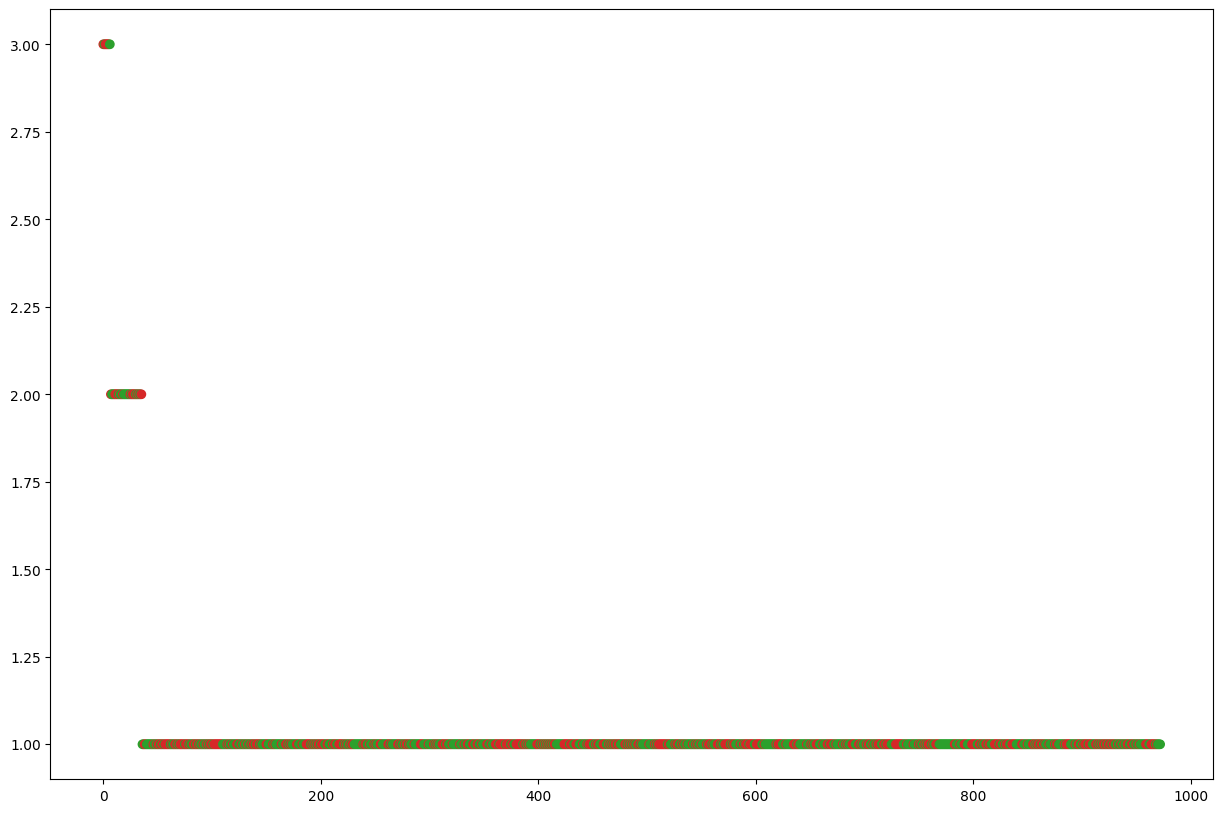

In [35]:
from matplotlib import pyplot as plt


# Построениие графика
plt.figure(figsize=(15, 10))
plt.scatter(x = pd.Series(range(0,len(ordersByUsers)))
           ,y = ordersByUsers[['orders']]
           ,c = ordersByUsers.group.map({'A':'tab:red', 'B':'tab:green'}) # Добавляет цвет группы
            )
plt.show()

Максимальное количество, сделанных одним посетителем ровно 3, однако в большинстве случаев оно не превышает 1.

## Вывод по первой части

Выполнив первую часть работы мы научились определять пересечения групп пользователя для А/А и А/В теста. Так же мы разобрались с тем что из себя представляют агрегированные кумулятивные данные полученные из сырых дынных логов системы, научились их создавать и строить по ним графики.

# Вторая часть

In [36]:
# Посмотрели данные
df_logs_exp

,event_name,device_id_hash,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246


## Вывели на экран количество каждого события в порядке убывания частоты

In [37]:
# Нашли кол-во записей о каждом фиксируемом собитии
df_logs_exp.groupby(by=['event_name'])['event_name'].count().sort_values(ascending = False)

event_name
MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: event_name, dtype: int64

Чаще всего встречается событие "MainScreenAppear", количество записей о нем равно 119 101.

## Подсчитали сколько пользователей совершали каждое из этих событий

In [38]:
# Определили кол-во уникальных пользователей, совершавших каждое из событий
df_logs_exp.groupby(by=['event_name']).agg({'device_id_hash':'nunique'}).sort_values(by=['device_id_hash'], ascending = False)

,device_id_hash
event_name,
MainScreenAppear,7439
OffersScreenAppear,4613
CartScreenAppear,3749
PaymentScreenSuccessful,3547
Tutorial,847


Распределение количества пользователей согласуется с количеством  совершений каждого действия

## Определили количество пользователей в каждой группе

In [39]:
# Посчитали пользователей в группах
df_logs_exp.groupby(by=['exp_id']).agg({'device_id_hash':'nunique'})

,device_id_hash
exp_id,
246,2489
247,2520
248,2542


Распределение пользователей по группам равномерное

## Нашли пользователей, которые пересекаются в группах

In [40]:
# Модуль для получения итератора по сочетиниям без повторений
from itertools import combinations

group = {}                                    # Словарь групп
group_names = df_logs_exp['exp_id'].unique()  # Список названий групп
inner_user_gr = []                            # Список кортежей с пересекающимися пользователями

# Выбеляем данные о группах ('exp_id') пользователей 
for gr_name in group_names:
  group[gr_name] = df_logs_exp.loc[df_logs_exp['exp_id'] == gr_name]

# Попарно проверяем пересечение пользователей
for first_gr_name, second_gr_name in combinations(group_names, 2):
  first_group = group[first_gr_name]
  second_group = group[second_gr_name]

  # Находим пересекающихся пользователей и сохранием их идентификаторы ('device_id_hash') в списке
  inner_user = pd.merge(first_group, second_group, how ='inner', on =['device_id_hash'])['device_id_hash'].unique()
  # print(first_gr_name, second_gr_name, inner_user)  # Тестовый вывод

  if len(inner_user) != 0: inner_user_gr.append((first_gr_name, second_gr_name, inner_user))

if inner_user_gr: print('Список пересечений пользователей:', *inner_user_gr, sep='\n')
else:             print('Пересечений пользователей по группам нет')

Пересечений пользователей по группам нет


Так как пересечения пользователей нет нам не нужно удалять записи, которые могли бы повлиять на проверку гипотез.

## А/А тест

**Проверка гипотезы о равенстве долей**

*   Нулевая гипотеза: Группа 246 и 247 не имеет различий
*   Альтернативная гипотеза: Группа 246 и 247 отличаются.

Функция получает на вход датасет (DATA), названия 2 групп которые необходимо проверить (group_a, group_b), название события для которого проводиться проверка (event) и уровень статистической значимости (alpha).

In [41]:
from scipy import stats as st
import numpy as np
import math as mth

def test_groups(DATA, group_a, group_b, event, alpha):
  # получим количество успехов
  group_users = np.array([DATA.query('event_name == @event and group == @group_a').user_id.nunique(),
                          DATA.query('event_name == @event and group == @group_b').user_id.nunique()])
  
  # получим количество пользователей в группах
  total_users = np.array([DATA.query('group == @group_a').user_id.nunique(),
                          DATA.query('group == @group_b').user_id.nunique()])
  # пропорция успехов в первой группе:
  p1 = group_users[0]/total_users[0]

  # пропорция успехов во второй группе:
  p2 = group_users[1]/total_users[1]
  
  # пропорция успехов в комбинированном датасете:
  p_combined = (group_users[0] + group_users[1]) / (total_users[0] + total_users[1])
  
  # разница пропорций в датасетах
  difference = p1 - p2

  # считаем статистику в ст.отклонениях стандартного нормального распределения
  z_value = difference / mth.sqrt(
      p_combined * (1 - p_combined) * (1 / total_users[0] + 1 / total_users[1])
  )

  # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
  distr = st.norm(0, 1)

  p_value = (1 - distr.cdf(abs(z_value))) * 2
  print('Группы', group_a,'и', group_b, 'cобытие', event,'\np-значение: ', p_value)

  if p_value < alpha: print('Отвергаем нулевую гипотезу: есть значимая разница между долями')
  else:               print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

In [42]:
# Переименовываем столбцы для соответствия логике функции
df_logs_exp.columns = ['event_name', 'user_id', 'event_timestamp', 'group']

In [43]:
# Проводим А/А тест для проверки гипотизы
for event in df_logs_exp.event_name.unique():
  test_groups(df_logs_exp, 246, 247, event, 0.05)
  print()

Группы 246 и 247 cобытие MainScreenAppear 
p-значение:  0.5856639791209877
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Группы 246 и 247 cобытие PaymentScreenSuccessful 
p-значение:  0.10902546202332886
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Группы 246 и 247 cобытие CartScreenAppear 
p-значение:  0.19817540651836918
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Группы 246 и 247 cобытие OffersScreenAppear 
p-значение:  0.3233225048227193
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Группы 246 и 247 cобытие Tutorial 
p-значение:  0.8756574258016974
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Так как не удалось отвергнуть нулевую гипотезу значит доли равны.

Такой результат говорит нам о том, что мы можем доверять результатам нашего теста при проведении А/В тестирования.

## А/B тест

* Нулевая гипотеза: Нет различиий между группой А (246) и группой B (248).
* Альтернативная: Есть различия между контрольной и экспериментальной группами.

In [44]:
# Проводим А/В тест для проверки гипотизы
for event in df_logs_exp.event_name.unique():
  test_groups(df_logs_exp, 246, 248, event, 0.05)
  print()

Группы 246 и 248 cобытие MainScreenAppear 
p-значение:  0.39774960182882513
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Группы 246 и 248 cобытие PaymentScreenSuccessful 
p-значение:  0.23403912852637143
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Группы 246 и 248 cобытие CartScreenAppear 
p-значение:  0.10534150642722295
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Группы 246 и 248 cобытие OffersScreenAppear 
p-значение:  0.2531656758489338
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Группы 246 и 248 cобытие Tutorial 
p-значение:  0.8962914725257976
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Так как нулевая гипотеза не была отвергнута, то тест показал, что значимых отличий между долями нет.

Из этого можно сделать вывод о том, что внесенные изменения не повлияли на конверсию заказов и их можно не вводить для всех пользователей.

Результатам этого теста мы можем доверять так как А/А тест был пройден успешно.

## Вывод по второй части

Определили частоту событий и нашли количество пользователей совершивших каждое из тестиремых событий в результате чего определили что больше всего записей о событии "MainScreenAppear" и соответственно его совершило больше всего уникальных пользователей.

Произвели поиск пересекающихся пользователей, который не выдал не одного пользователя, это говорит о корректном разделении пользователей на группы.

Произвели А/А тестирование результаты которого показали, что выборка достаточна и можно доверять результатам последующего А/В теста.

Проведя А/В тест получили результат, говорящий о том, что тестируемые изменения не несут статистической значимости в изменение конверсии посетителей в заказы значит их можно не вносить для всех пользователей.

# ОБЩИЙ ВЫВОД

В ходе данной лабораторной работы мы подготовили собранные данные для анализа, избавились от пропусков и дубликатов, исправили типы данных и названия столбцов, а также проверили чтобы в данных не осталось информации о пересекающихся пользователях.

В первой части работы мы получили по собранным данным агрегированные кумулятивные данные о посетителях и заказах по дням и построил график количества заказов по пользователям.

Во второй части получили агрегированные данные о событиях, а также провели АА и АВ тестирование, результатом которого стало решение о том, что тестируемые на группе 248 нововведения вводить для всех пользователей не имеет смысла, потому что они не изменяют конверсию посетителей в заказы.

